In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score # 정확도, 정밀도와 재현율, roc auc율
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve  # f1 스코어, 혼동행렬, 재현율 curve, roc 곡선
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')   # csv를 읽어와서  diabetes_data 변수로 집어넣음
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetes_data.info()   # 데이터 형식이 str이나 object 가 하나도 없음. 피쳐 인코딩은 필요하지 않음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 로지스틱 회귀를 이용해 예측 수행 및 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 분리.

In [18]:
# 앞서 구현한 get_clf_eval() 함수에 ROC AUC 값을 구하는 로직을 추가해 임곗값 변화시키며 평가지표 구함.


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)   # 오차행렬
    accuracy = accuracy_score(y_test,pred)  # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율
    f1 = f1_score(y_test, pred)    # F1 스코어 추가
    roc_score = roc_auc_score(y_test, pred)  # ROC AUC 값 추가
    print('오차 행렬')
    print(confusion)
    # 모든 Score 출력
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    
    
#thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]
#pred_proba = lr_clf.predict_proba(X_test)  # 피쳐들의 예측값
#get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [19]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
X = diabetes_data.iloc[:, :-1] # Outcome 칼럼 제외 전부 추출 (피처데이터세트)
y = diabetes_data.iloc[:, -1] # 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해  Outcome 값만 추출 (피처데이터세트)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, ROC AUC: 0.7313


## 재현율 성능에 조금 더 초점을 맞춰보기. 
## 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인 -> precision_recall_curve_plot() 함수를 이용

In [23]:
# 정밀도와 재현율 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1 )
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') # 정밀도는 점선으로 표시
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

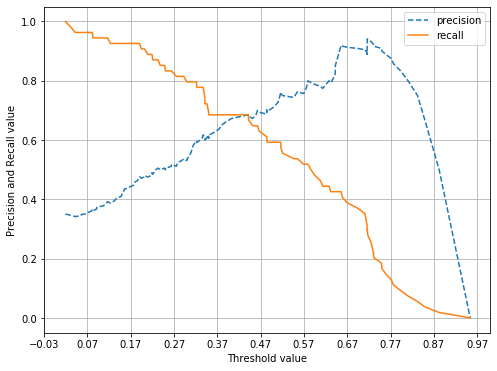

In [33]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, -1]
# print(pred_proba_c1)

precision_recall_curve_plot(y_test, pred_proba_c1)

### 위 곡선을 바탕으로, 임곗값을 0.42 정도로 낮추면 정밀도와 재현율 균형 가능
#### 그러나, 두 지표 모두 0.7이 안되는 수치로 보임. 
##### 지표 값 조정에 앞서서 데이터 값을 점검 (피쳐 값 분포도로 살펴본다)

In [34]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 위 값을 보면 min 값이 0으로 돼 있는 피처가 상당히 많음. 
    -> 예를들어, Glucose 는 '포도당 수치' 인데 min 값이 0인 것은 말이 되지 않는다. 
    
### 히스토그램으로 확인해보자

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

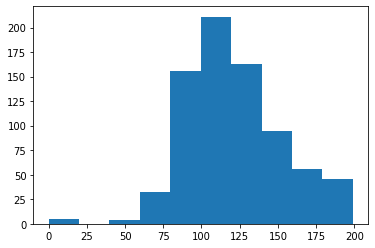

In [35]:
plt.hist(diabetes_data['Glucose'], bins=10)

# 0이 조금 존재한다. 이렇게 0값이 존재하는 것들이 몇 몇 건 된다.

# min() = 0 인 피처에 대해 0값의 건수 / 전체 데이터 건수 대비 몇 퍼센트 비율로 존재하는 지 확인

In [39]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # 0 값을 검사할 피처 명 리스트
total_count = diabetes_data['Glucose'].count() # 전체 데이터 건수

# 아래는, 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트를 계산한다.
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}개, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5개, 퍼센트는 0.65 %
BloodPressure 0 건수는 35개, 퍼센트는 4.56 %
SkinThickness 0 건수는 227개, 퍼센트는 29.56 %
Insulin 0 건수는 374개, 퍼센트는 48.70 %
BMI 0 건수는 11개, 퍼센트는 1.43 %


## SkinThickness와 Insulin의 0값은 각각 전체의 29.56%, 48.7%로 대단히 많다. 
# 이 피처들의 0값을 평균값으로 대체한다.

In [72]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

# 기본 DB 자체를 바꿔버린다. 

# 0값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환. (피처를 늘리거나 확장하거나 수정하는 것)
    -> 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다.

In [73]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.

##### 바뀐 DB를 기반으로 다시 값들 추출

X = diabetes_data.iloc[:, :-1] # Outcome 칼럼 제외 전부 추출 (피처데이터세트)
y = diabetes_data.iloc[:, -1] # 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해  Outcome 값만 추출 (피처데이터세트)

scaler = StandardScaler()   # StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
X_scaled = scaler.fit_transform(X)

#print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, ROC AUC: 0.7556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 위는, StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.

# 스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.

### 여전히 재현율 수치는 개선 필요.

## 임곗값을 0.3~0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력

In [56]:
from sklearn.preprocessing import Binarizer

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

def get_clf_eval2(y_test, pred):
    accuracy = accuracy_score(y_test,pred)  # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율
    f1 = f1_score(y_test, pred)    # F1 스코어 추가
    roc_score = roc_auc_score(y_test, pred)  # ROC AUC 값 추가
    # 모든 Score 출력
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):   # pred_proba_c1 새로이 추가
    # thresholds list객체 내의 값을 차례로 iteration(반복)하면서 Evauation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  # fit으로 x_test 값에 해당하는 pred_proba_c1 사용
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval2(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
정확도: 0.7013, 정밀도: 0.5513, 재현율: 0.7963, F1: 0.6515, ROC AUC: 0.7231
임곗값: 0.33
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, F1: 0.6825, ROC AUC: 0.7531
임곗값: 0.36
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, ROC AUC: 0.7411
임곗값: 0.39
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, ROC AUC: 0.7419
임곗값: 0.42
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, ROC AUC: 0.7533
임곗값: 0.45
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, ROC AUC: 0.7583
임곗값: 0.48
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, ROC AUC: 0.7641
임곗값: 0.5
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, ROC AUC: 0.7556


# 결과를 바탕으로 하니, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, ROC AUC: 0.7641 경우가 가장 나은 듯.

## 사이킷런의 predict() 메서드는 임곗값을 마음대로 변환할 수 없으므로 별도의 로직으로 이를 구해야 한다.
### Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과를 확률 값을 변환해 변경된 임곗값에 따른 예측 클래스 구하기

In [69]:
binarizer = Binarizer(threshold=0.48) # 임곗값을 0.48로 설정한 Binarizer 생성

# 위에서 추출한 pred_proba = lr_clf.predict_proba(X_test) 결과에서 이진 분류 중 두번째에 해당하는 array에서 1에 해당하는 칼럼값을 변환

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048)

print( pred_proba[:,1].reshape(-1,1) )  # reshape는 일렬로 세우는 것



오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, ROC AUC: 0.7641
[[0.03609018]
 [0.20217293]
 [0.15928588]
 [0.5681113 ]
 [0.41651923]
 [0.75549138]
 [0.83987164]
 [0.15198534]
 [0.19444674]
 [0.1077338 ]
 [0.66955827]
 [0.39625109]
 [0.04715651]
 [0.39291971]
 [0.26530665]
 [0.09318057]
 [0.79415787]
 [0.08938344]
 [0.5860422 ]
 [0.80457251]
 [0.41814913]
 [0.34954916]
 [0.06452018]
 [0.3194815 ]
 [0.30000267]
 [0.10537022]
 [0.92130861]
 [0.75027822]
 [0.17419735]
 [0.88879611]
 [0.23061778]
 [0.23754691]
 [0.11313996]
 [0.15306837]
 [0.10329326]
 [0.74313694]
 [0.2224308 ]
 [0.20825111]
 [0.85342706]
 [0.66495884]
 [0.41219643]
 [0.23686881]
 [0.70419015]
 [0.13055228]
 [0.34605328]
 [0.0150281 ]
 [0.46644956]
 [0.08887057]
 [0.48910823]
 [0.33082282]
 [0.31213555]
 [0.91820103]
 [0.89749958]
 [0.06165143]
 [0.12671445]
 [0.43108455]
 [0.07021933]
 [0.35552394]
 [0.3317995 ]
 [0.39565923]
 [0.18076256]
 [0.83760011]
 [0.33534618]
 [0.62537857]
 [0.3051479 

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

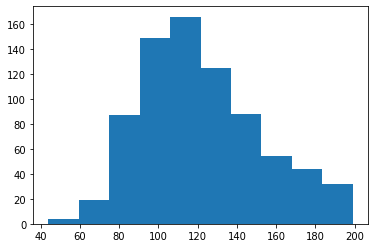

In [70]:
plt.hist(diabetes_data['Glucose'], bins=10)

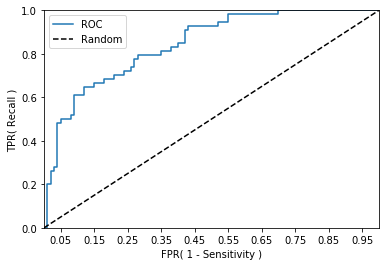

In [78]:
# FPR, TPR 임곗값 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])